### L’algorithme génétique est constitué d'une population d’individus qui évolue par application des opérateurs génétiques issus de la théoriede Darwin. Chaque individu représente une solution candidate à un problème donné. Un codage binaire ou réel sera utilisé selon la nature du problème à résoudre. 
### L’algorithme génétique est itératif et commence avec une population initialisée  aléatoirement dans l’espace de recherche. 
### Durant chaque itération, la fitness de chaque individu de la population est évaluée; la fitness représente la fonction objective du problème qu’on veut optimiser.  Les individus de la population les mieux adaptés ont plus de choix d’être sélectionnés pour être combinés et éventuellement mutés et former une nouvelle population qui sera par la suite utilisée dans la prochaine itération de l’algorithme. 
### L’algorithme se termine quand le nombre maximum des itérations est atteint.  

# TP1  L'algorithme génétique 

##  Application de l'algorithme génétique pour l'optimisation de fonctions

## On considère la fonction $$f(x)= 31x- x^2 $$  
## $x$ est un entier et $x$ ε $[0,31]$

## Proposer une implémentation d’un algorithme génétique AG avec un codage binaire pour trouver le maximum de la fonction f. 
 

In [48]:
import random
import matplotlib.pyplot as pl
import numpy as np

In [49]:
## 1. Initialisation des paramètres de l'algorithme génétique

In [50]:
Npop = 50
n = 5    
Pr_cr = 0.9 
Pr_mut = 0.01 
Maxgen = 1000

In [51]:
## 2. Définition de la fonction à optimiser : la fitness

In [52]:
# TODO
def fitness(x):
    return 31 * x - x**2

In [53]:

def calcFit(chromosome):
    return fitness(int(''.join(map(str, chromosome)), 2))
## 3. Initialisation de la population 

In [54]:
def population_initiale(Npop, n):
    population = []
    for _ in range(Npop):
        chromosome = [random.randint(0, 1) for _ in range(n)]
        fitnessV = 0
        population.append((chromosome, fitnessV))
    return population


In [55]:
## 4. Evaluation de la qualité de chaque solution 

In [56]:
# TODO
def evaluate_population(population):
    for i in range(len(population)):
        chromosome, _ = population[i]
        population[i] = (chromosome, calcFit(chromosome))           

In [57]:
## 5. l'operateur selection par tournoi

In [58]:
# Fonction d'opérateur de sélection par tournoi
# Selected est la sous_population sélectionnée pour le crossover et la mutation
# TODO
def tournament_selection(population, k):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(population, k)    
        winner = max(tournament, key=lambda ind: ind[1])
        selected.append(winner)
    return selected


In [59]:
## 6. L'opérateur crossover

In [60]:
# TODO
def crossover(population, Pr_cr):
    descendants = []
    for _ in range(len(population) // 2):
        parent1, parent2 = random.sample(population, 2)
        if random.random() < Pr_cr:
            crossover_point = random.randint(1, len(parent1[0]) - 1)
            child1 = parent1[0][:crossover_point] + parent2[0][crossover_point:]
            child2 = parent2[0][:crossover_point] + parent1[0][crossover_point:]
            descendants.append((child1, calcFit(child1)))
            descendants.append((child2, calcFit(child2)))
        else:
            descendants.append(parent1)
            descendants.append(parent2)
    return descendants


In [61]:
## 7. L'opérateur de mutation

In [62]:
# TODO
# Fonction d'opérateur de mutation
def mutation(population, Pr_mut):
    for i in range(len(population)):
        chromosome, _ = population[i]
        mutated_chromosome = [bit if random.random() >= Pr_mut else 1 - bit for bit in chromosome]
        population[i] = (mutated_chromosome, calcFit(mutated_chromosome))

    

In [63]:
# fonction remplacement
# 3 remplacements sont utilisés:  les fils remplacent toujours les parents
#                                 Les fils remplacent les parents s'ils sont meilleurs
#                                 les fils sont injectés dans la population et les Npop meilleurs individus sont choisis
# les parametres de cette fonction dépendent de la stratégie choisie
def replacement(population, descendants, strategy='always_replace'):
    if strategy == 'always_replace':
        population[:] = descendants
    elif strategy == 'replace_if_better':
        for i in range(len(population)):
            if descendants[i][1] > population[i][1]:  # Compare fitness values
                population[i] = descendants[i]
    elif strategy == 'inject_and_select_best':
        combined_population = population + descendants
        combined_population.sort(key=lambda x: x[1], reverse=True)  # Sort by fitness, highest to lowest
        population[:] = combined_population[:len(population)]  # Select top individuals
    else:
        raise ValueError("Invalid strategy specified.")


In [64]:
## 8. le programme principal

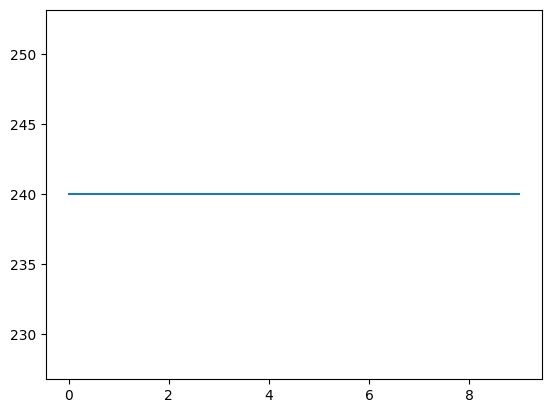

In [65]:
fit = []   # Contains the maximum fitness obtained during the 10 runs
for run in range(10):
    population = population_initiale(Npop, n)
    gen = 0
     
    while gen < Maxgen:
        evaluate_population(population)
        selected = tournament_selection(population, 2)
        descendants = crossover(selected, Pr_cr)
        mutation(descendants, Pr_mut)
        replacement(population, descendants, strategy='always_replace')
        gen += 1
    
    max_value = max(population, key=lambda ind: ind[1])
    fit.append(max_value[1])  

pl.plot(fit)




In [66]:
average=np.mean(fit)
print("la solution moyenne =",average)

la solution moyenne trouvée= 240.0
